# CM3070 Final Project

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("rainfall_data.csv", na_values = "-")
print(data.shape)
data.head()

(175419, 13)


,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (C),Maximum Temperature (C),Minimum Temperature (C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,Paya Lebar,2013.0,6.0,1.0,1.2,NaN,NaN,NaN,NaN,33.7,23.8,8.2,63.0
1,Paya Lebar,2013.0,6.0,2.0,0.0,NaN,NaN,NaN,NaN,33.6,25.9,7.4,25.9
2,Paya Lebar,2013.0,6.0,3.0,38.0,NaN,NaN,NaN,NaN,33.5,26.2,7.6,24.1
3,Paya Lebar,2013.0,6.0,4.0,0.0,NaN,NaN,NaN,NaN,32.2,26.1,8.8,27.7
4,Paya Lebar,2013.0,6.0,5.0,64.1,NaN,NaN,NaN,NaN,35.0,23.6,9.2,37.1


In [12]:
# Explore NA values within the data

display(data.isna().sum())

Station                               0
Year                                364
Month                               364
Day                                 364
Daily Rainfall Total (mm)          7887
Highest 30 Min Rainfall (mm)      26125
Highest 60 Min Rainfall (mm)      26208
Highest 120 Min Rainfall (mm)     26205
Mean Temperature (C)             116646
Maximum Temperature (C)          113552
Minimum Temperature (C)          113562
Mean Wind Speed (km/h)           113135
Max Wind Speed (km/h)            113096
dtype: int64

NA values are present in the data because of a few reasons. 
Firstly, data collected from some stations are not available before some years as they were not set up yet. 
http://www.weather.gov.sg/wp-content/uploads/2022/06/Station_Records.pdf 

Also, some NA values are present in the date. This could be because of errors in data handling which we will have to remove

Because of these NA values, town level data is highly unusable. As such, we will be aggregating data across all towns to get
country level data

Due to the large number of observations we will be replacing NA values with mean values from the data \
https://stackoverflow.com/questions/52570199/multivariate-lstm-with-missing-values

In [13]:
# Drop data where date values are NA
date_missing = data[data["Year"].isna()].index
partial_clean = data.drop(index = date_missing)

partial_clean["Date"] = pd.to_datetime({
    "year": partial_clean["Year"],
    "month": partial_clean["Month"],
    "day": partial_clean["Day"]
})

# Replace all missing values with average values from the data
columns_w_na = partial_clean.columns[partial_clean.isna().sum() > 0]

for col in columns_w_na:
    mean_value = partial_clean.loc[
        ~partial_clean[col].isna(), col
    ].mean()

    partial_clean[col] = partial_clean[col].fillna(mean_value)

display(partial_clean.isna().sum())

Station                          0
Year                             0
Month                            0
Day                              0
Daily Rainfall Total (mm)        0
Highest 30 Min Rainfall (mm)     0
Highest 60 Min Rainfall (mm)     0
Highest 120 Min Rainfall (mm)    0
Mean Temperature (C)             0
Maximum Temperature (C)          0
Minimum Temperature (C)          0
Mean Wind Speed (km/h)           0
Max Wind Speed (km/h)            0
Date                             0
dtype: int64

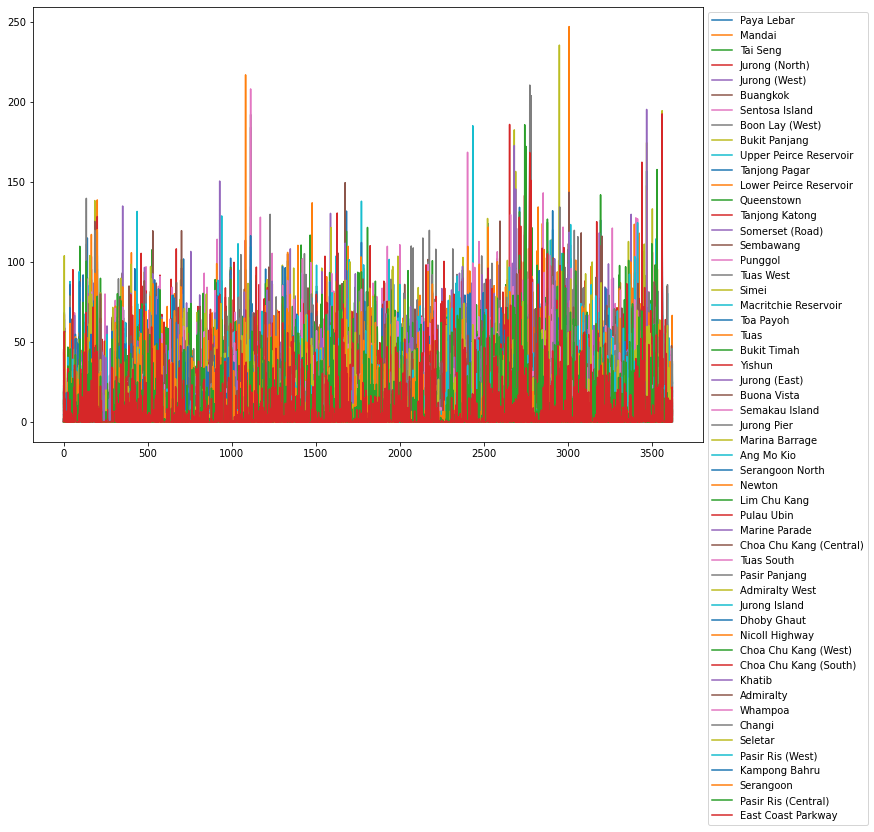

In [14]:
# Plot the rainfall for each day
data_clean = partial_clean.sort_values(by = "Date")

plt.figure(figsize = (12, 8))
for station in data_clean["Station"].unique():
    station_rainfall = data_clean.loc[
        data_clean["Station"] == station, "Daily Rainfall Total (mm)"
    ].reset_index(drop = True)
    plt.plot(station_rainfall, label = station)

plt.legend(bbox_to_anchor = (1, 1))
plt.show()

In [15]:
# Add up rainfall across singapore, and aggregate all other metrics to get nation wide data

# First, drop the Station columns, then group by date. Next, aggregate all feature columns across the dates
nation_data = data_clean.drop(columns = "Station").groupby("Date").agg({
    "Daily Rainfall Total (mm)": "sum",
    "Highest 30 Min Rainfall (mm)": "sum",
    "Highest 60 Min Rainfall (mm)": "sum",
    "Highest 120 Min Rainfall (mm)": "sum",
    "Mean Temperature (C)": "mean",
    "Maximum Temperature (C)": "max",
    "Minimum Temperature (C)": "min",
    "Mean Wind Speed (km/h)": "mean",
    "Max Wind Speed (km/h)": "max"
})

nation_data.head()

,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (C),Maximum Temperature (C),Minimum Temperature (C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
Date,,,,,,,,,
2013-06-01,368.1,208.41633,258.853912,294.602618,28.034674,35.1,22.2,7.455433,63.0
2013-06-02,55.2,208.41633,258.853912,294.602618,28.327481,35.5,22.9,7.705433,72.7
2013-06-03,277.2,208.41633,258.853912,294.602618,28.203407,34.0,24.1,7.599878,46.4
2013-06-04,35.1,208.41633,258.853912,294.602618,27.986740,33.7,24.0,7.722100,57.6
2013-06-05,1495.9,208.41633,258.853912,294.602618,27.771925,35.0,22.9,7.777655,59.8


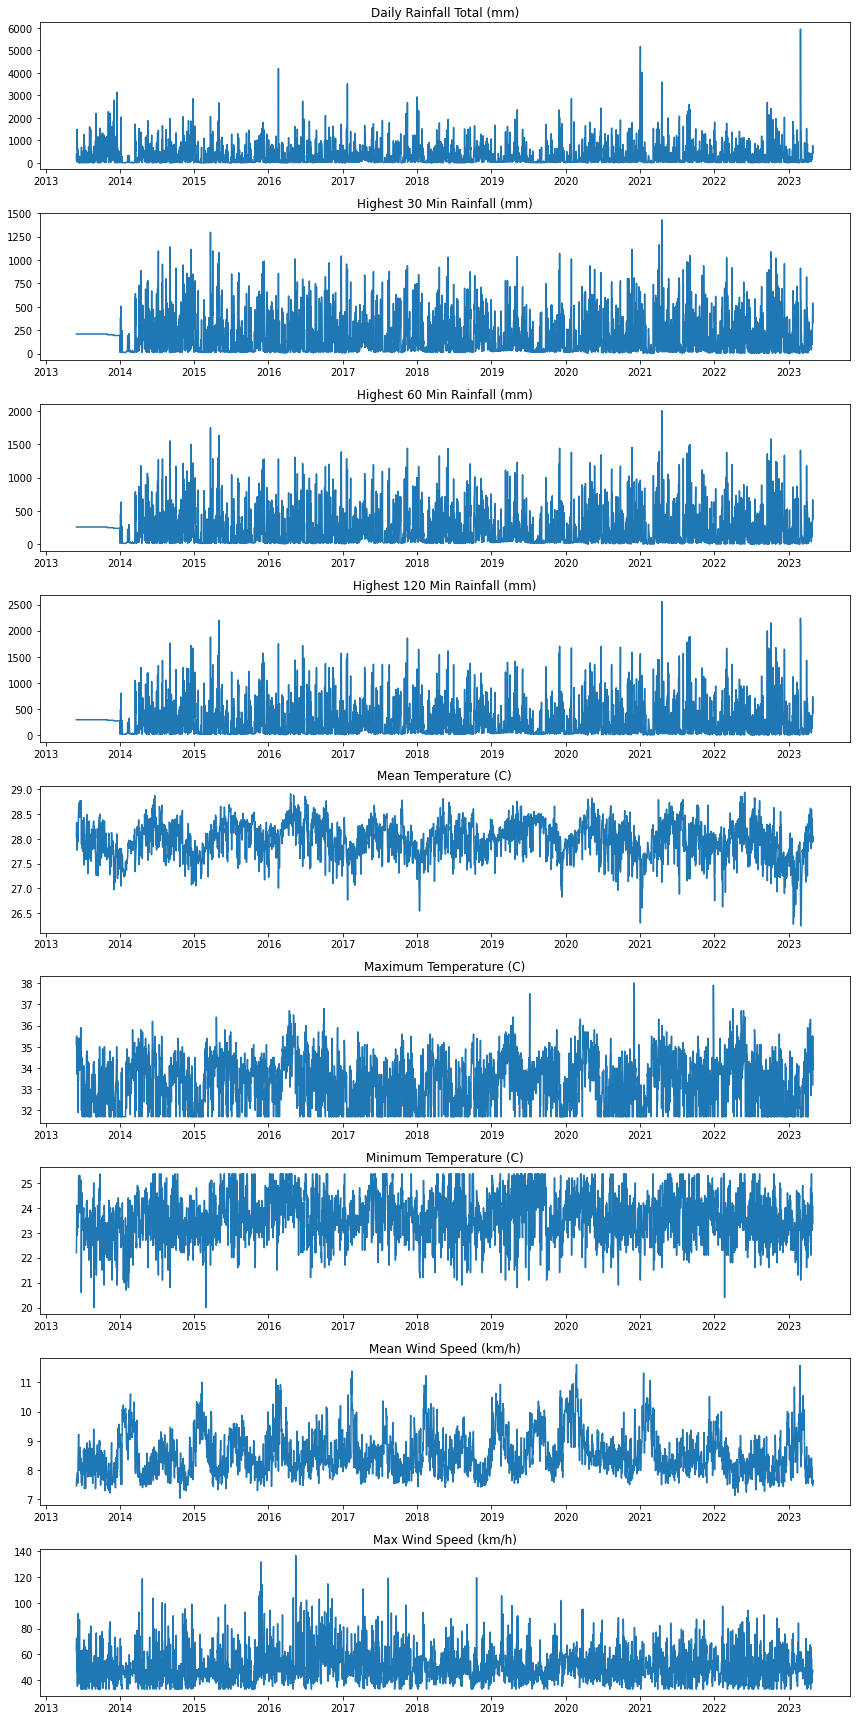

In [16]:
# Show plots of features across singapore

fig, axs = plt.subplots(nrows = 9, ncols = 1, figsize = (12, 24))
for i, column in enumerate(nation_data.columns):
    axs[i].plot(nation_data[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

The plot of daily rainfall across each town shows very random patterns, with large number of outliers. Showing a large amount of random noise. \
With the number of observations with have (10 years worth of daily data with only 9 features), it might be insufficient to build a model that performs well.

As such, a better approach might be to aggregate the data into monthly observations instead, which would reduce the amount of the noise in the data, allowing the model to learn patterns much more easily

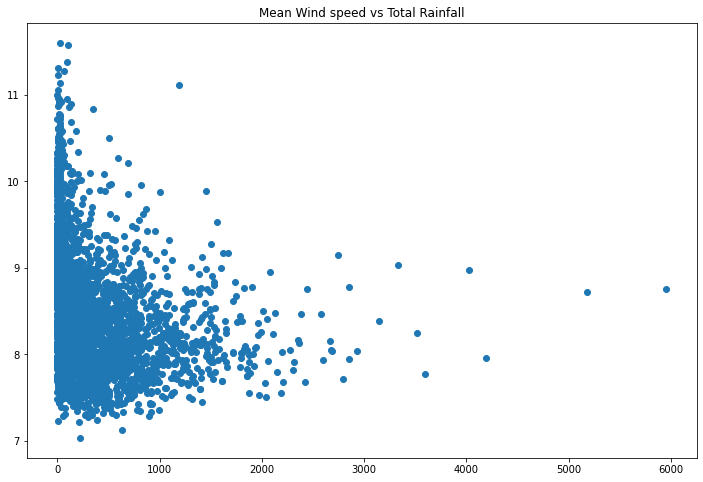

In [17]:
# Wind speeds seem to show a more clear seasonal trend, which might make it a good predictor of rainfall

plt.figure(figsize = (12, 8))
plt.title("Mean Wind speed vs Total Rainfall")
plt.scatter(nation_data["Daily Rainfall Total (mm)"], nation_data["Mean Wind Speed (km/h)"])
plt.show()

Linear relationship is not very strong between wind speed and rainfall

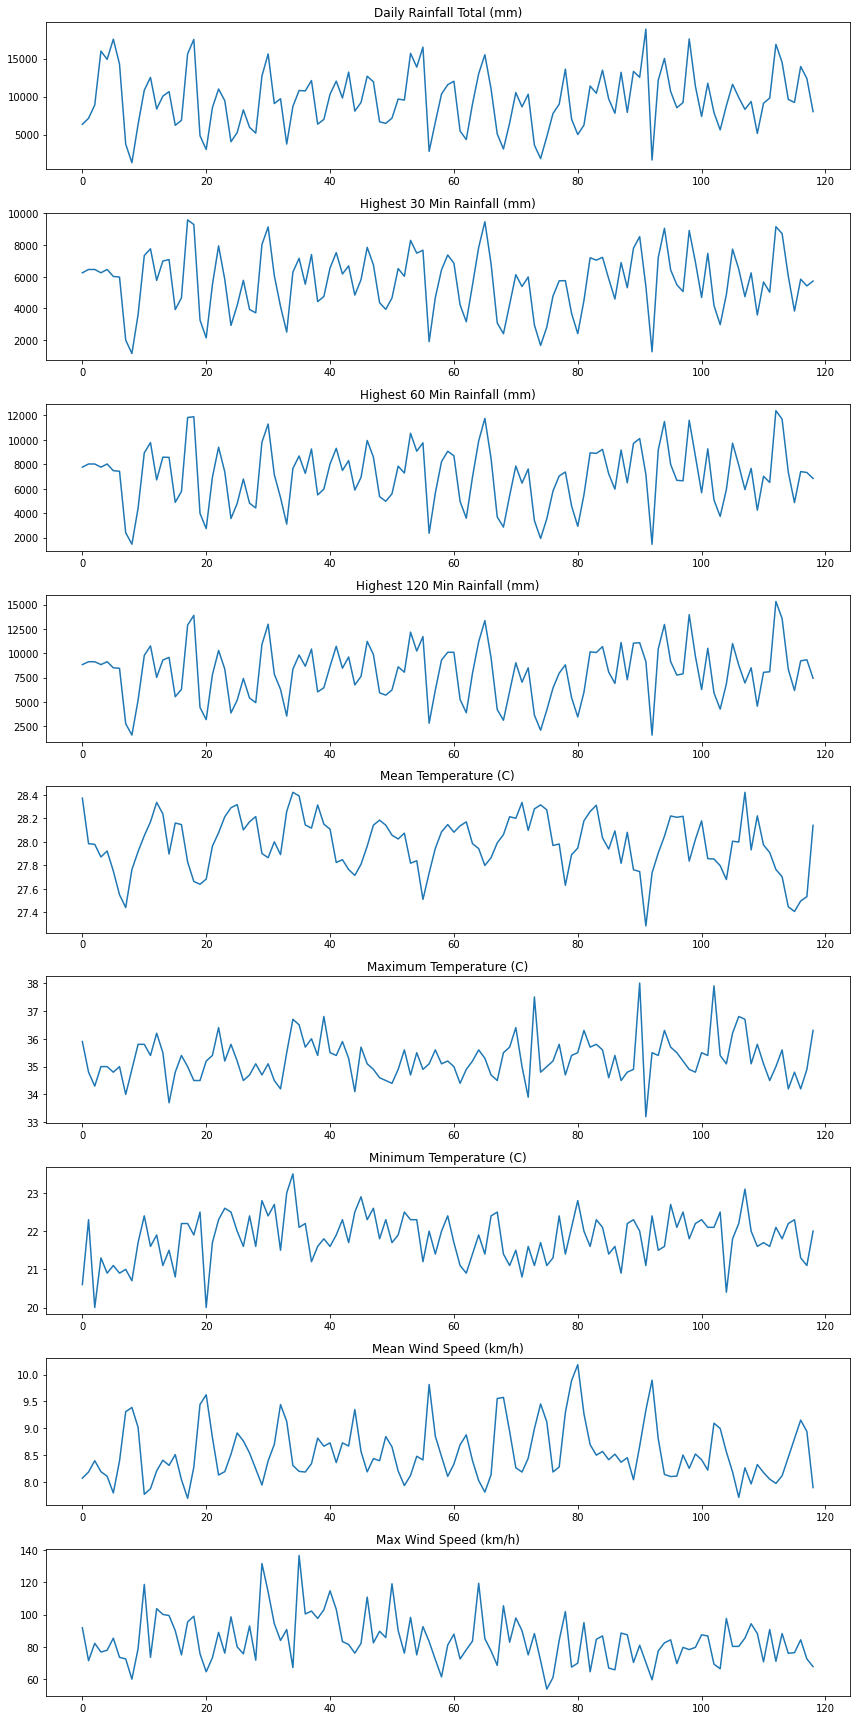

In [18]:
# Too much variation in daily data, we will aggregate to monthly data instead

nation_data_w_date = data_clean.drop(columns = "Station").groupby(["Month", "Year"]).agg({
    "Daily Rainfall Total (mm)": "sum",
    "Highest 30 Min Rainfall (mm)": "sum",
    "Highest 60 Min Rainfall (mm)": "sum",
    "Highest 120 Min Rainfall (mm)": "sum",
    "Mean Temperature (C)": "mean",
    "Maximum Temperature (C)": "max",
    "Minimum Temperature (C)": "min",
    "Mean Wind Speed (km/h)": "mean",
    "Max Wind Speed (km/h)": "max",
}).reset_index(drop = False).sort_values(by = ["Year", "Month"]).reset_index(drop = True)


fig, axs = plt.subplots(nrows = 9, ncols = 1, figsize = (12, 24))
feature_columns = [cols for cols in nation_data_w_date.columns if cols not in ["Year", "Month"]]
for i, column in enumerate(feature_columns):
    axs[i].plot(nation_data_w_date[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

With monthly data being constructed, we now prepare the data for modelling

In [19]:
from datetime import datetime

# Use the first 6 years of data to train, 2 years for validation and last 2 years of data to test
year = nation_data_w_date["Year"]
train_stop = 2019
val_stop = 2021

train_data = nation_data_w_date[year < 2019].drop(columns = ["Month", "Year"])
val_data = nation_data_w_date[(year >= 2019) & (year < 2021)].drop(columns = ["Month", "Year"])
test_data = nation_data_w_date[year >= val_stop].drop(columns = ["Month", "Year"])

display(train_data)
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

from sklearn.preprocessing import MinMaxScaler
# Scale the data to 0 - 1 for numerical stability

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)

,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (C),Maximum Temperature (C),Minimum Temperature (C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,6362.700000,6252.489906,7765.617347,8838.078532,28.372528,35.9,20.6,8.067869,91.8
1,7154.522719,6460.906236,8024.471259,9132.681149,27.984583,34.8,22.3,8.183091,71.3
2,8894.700000,6460.906236,8024.471259,9132.681149,27.978967,34.3,20.0,8.393964,82.1
3,15975.136315,6252.489906,7765.617347,8838.078532,27.871548,35.0,21.3,8.188952,76.7
4,14894.188464,6460.906236,8024.471259,9132.681149,27.922339,35.0,20.9,8.103402,77.8
...,...,...,...,...,...,...,...,...,...
62,4363.013596,3160.234852,3586.539868,3895.727215,28.170652,34.9,20.9,8.876441,78.1
63,9030.127016,5478.672497,6949.613007,7937.763021,27.984988,35.2,21.4,8.396378,83.5
64,13009.097410,7851.098196,9904.196325,11176.440168,27.942958,35.6,21.9,8.023536,119.5
65,15500.117893,9475.848991,11757.861735,13352.107853,27.799007,35.3,21.4,7.807314,85.0


(67, 9)
(24, 9)
(28, 9)


LSTM requires data in the following shape for training: \
(Number of Observations, Batch Size, Number of Features)

We will be using 12 month's worth of data to predict the 13th month rainfall. As such, our batch size is 12. \
From the starting date, we will create a sliding window of 12 months to use for the features, and then use that to predict the 13th month of rainfall. We slide this window across the data until we have covered all possible batches of data. This process is repeated for the training, validation and test set

In [20]:
from sklearn.preprocessing import StandardScaler
# Create a sliding window of 12 months's worth of data for LSTM training

X_train = []
y_train = []
for i in range(len(train_data) - 12):
    y = train_data[i + 12, 0]
    X = train_data[i : i + 12, :]

    X_train.append(X)
    y_train.append(y)

X_val = []
y_val = []
for i in range(len(val_data) - 12):
    y = val_data[i + 12, 0]
    X = val_data[i : i + 12, :]

    X_val.append(X)
    y_val.append(y)

X_test = []
y_test = []
for i in range(len(test_data) - 12):
    y = test_data[i + 12, 0]
    X = test_data[i : i + 12, :]

    X_test.append(X)
    y_test.append(y)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(55, 12, 9)
(12, 12, 9)
(16, 12, 9)
(55,)
(12,)
(16,)


To build a LSTM network, we use 2 LSTM layers of 100 nodes as feature extraction, then follow it up with 3 fully connected layers of 256 nodes each. \
2 layers of LSTM should be sufficient to extract features from complex data such as rainfall. \
https://towardsdatascience.com/choosing-the-right-hyperparameters-for-a-simple-lstm-using-keras-f8e9ed76f046#:~:text=Generally%2C%202%20layers%20have%20shown,to%20find%20reasonably%20complex%20features.

The loss function used is mean squared error, as we want the model to be more sensitive to outliers, which we have found to be in abundance in the data. \
The metrics used to evaluate the model is mean squared error and mean absolute error.

We train the model for 200 epochs

In [21]:
import keras
from keras import Sequential
from keras import layers


def LSTM_model(shape):
    model = Sequential()

    model.add(layers.Bidirectional(
        layers.LSTM(100, input_shape = shape, return_sequences = True))
    )
    model.add(layers.Dropout(0.3))

    model.add(layers.Bidirectional(
        layers.LSTM(100, return_sequences = False))
    )
    model.add(layers.Dropout(0.3))


    model.add(layers.Dense(256, activation = "relu"))
    model.add(layers.Dense(256, activation = "relu"))
    model.add(layers.Dense(256, activation = "relu"))

    model.add(layers.Dense(1))

    model.compile(
        optimizer = "adam",
        loss = keras.losses.MeanSquaredError(),
        metrics = [keras.metrics.MeanSquaredError(name = "MSE"), keras.metrics.MeanAbsoluteError(name = "MAE")]
    )

    return model


lstm = LSTM_model(X_train.shape[1: ])
lstm_history = lstm.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 200)

Epoch 1/200
2/2 [==============================] - 29s 5s/step - loss: 0.2423 - MSE: 0.2423 - MAE: 0.4322 - val_loss: 0.0354 - val_MSE: 0.0354 - val_MAE: 0.1630
Epoch 2/200
2/2 [==============================] - 0s 202ms/step - loss: 0.0772 - MSE: 0.0772 - MAE: 0.2302 - val_loss: 0.0266 - val_MSE: 0.0266 - val_MAE: 0.1487
Epoch 3/200
2/2 [==============================] - 0s 186ms/step - loss: 0.0568 - MSE: 0.0568 - MAE: 0.1923 - val_loss: 0.0787 - val_MSE: 0.0787 - val_MAE: 0.2333
Epoch 4/200
2/2 [==============================] - 0s 165ms/step - loss: 0.0665 - MSE: 0.0665 - MAE: 0.2096 - val_loss: 0.0704 - val_MSE: 0.0704 - val_MAE: 0.2181
Epoch 5/200
2/2 [==============================] - 0s 169ms/step - loss: 0.0590 - MSE: 0.0590 - MAE: 0.1956 - val_loss: 0.0307 - val_MSE: 0.0307 - val_MAE: 0.1580
Epoch 6/200
2/2 [==============================] - 0s 202ms/step - loss: 0.0550 - MSE: 0.0550 - MAE: 0.1867 - val_loss: 0.0274 - val_MSE: 0.0274 - val_MAE: 0.1502
Epoch 7/200
2/2 [=======

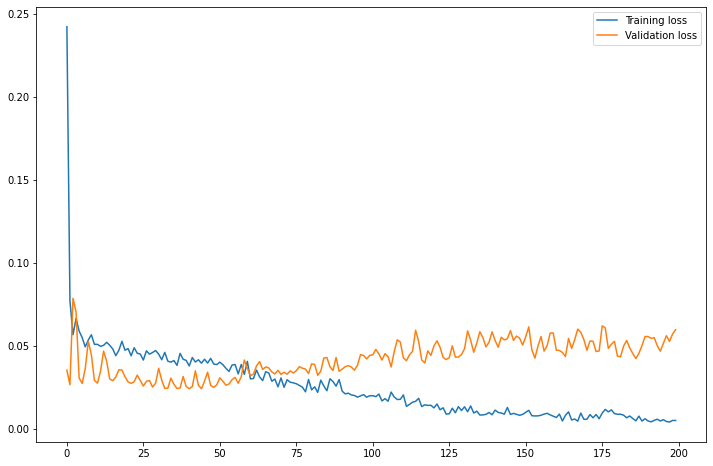

In [22]:
plt.figure(figsize = (12, 8))
plt.plot(lstm_history.history["loss"], label = "Training loss")
plt.plot(lstm_history.history["val_loss"], label = "Validation loss")
plt.legend()
plt.show()

2/2 [==============================] - 5s 23ms/step


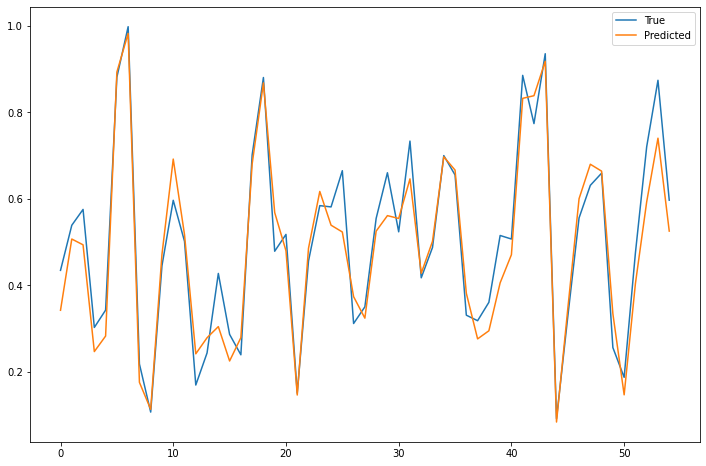

In [23]:
y_pred = lstm.predict(X_train)

plt.figure(figsize = (12, 8))
plt.plot(y_train, label = "True")
plt.plot(y_pred, label = "Predicted")
plt.legend()
plt.show()

The model seems to perform well in modelling rainfall data

### Perform hyperparameter tuning

In [24]:
# Define a function to create a model with varying layers and nods
def LSTM_model(shape, num_lstm_layers, num_lstm_nodes, num_dense_layers, num_dense_nodes):
    model = Sequential()

    for i in range(num_lstm_layers):
        if i == (num_lstm_layers - 1):
            return_sequence = False
        else:
            return_sequence = True
        
        model.add(layers.Bidirectional(
            layers.LSTM(num_lstm_nodes, input_shape = shape, return_sequences = return_sequence))
        )
        model.add(layers.Dropout(0.3))

    for i in range(num_dense_layers):
        model.add(layers.Dense(num_dense_nodes, activation = "relu"))

    model.add(layers.Dense(1))

    model.compile(
        optimizer = "adam",
        loss = keras.losses.MeanSquaredError(),
        metrics = [keras.metrics.MeanSquaredError(name = "MSE"), keras.metrics.MeanAbsoluteError(name = "MAE")]
    )

    return model

Validation has to be performed manually since cross validation cannot be performed on time series data as the time element between training sets needs to be maintained. Hence, we fit the model on the training set, trained with 200 epochs, followed by an evaluation on a validation set.

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

input_shape = X_train.shape[1: ]
parameters = {
    "num_lstm_layers": [1, 2, 3],
    "num_lstm_nodes": [75, 100, 125],
    "num_dense_layers": [2, 3, 4],
    "num_dense_nodes": [128, 256, 512]
}

num_params = 3**4
num_iter = 0

tuning_results = {}
for num_lstm_layer in parameters["num_lstm_layers"]:
    for num_lstm_node in parameters["num_lstm_nodes"]:
        for num_dense_layer in parameters["num_dense_layers"]:
            for num_dense_node in parameters["num_dense_nodes"]:
                print(f"{num_iter}/{num_params}", end = "\r")
                
                model = LSTM_model(
                    input_shape, num_lstm_layer, num_lstm_node, num_dense_layer, num_dense_node
                )

                model.fit(X_train, y_train, epochs = 200, verbose = 0)
                val_pred = model.predict(X_val, verbose = 0)

                mse = mean_squared_error(y_val, val_pred)
                mae = mean_absolute_error(y_val, val_pred)

                tuning_results[
                    f"{num_lstm_layer}, {num_lstm_node}, {num_dense_layer}, {num_dense_node}"
                ] = [mse, mae]

                num_iter += 1

In [26]:
lowest_mse = 10
best_params = ""
for param, values in tuning_results.items():
    mse, mae = values
    if mse < lowest_mse:
        lowest_mse = mse
        best_params = param

best_params, lowest_mse

('1, 75, 4, 256', 0.026183192315682727)

### Train model until overfitting

In [32]:
best_lstm = LSTM_model(input_shape, 1, 75, 4, 256)
best_history = best_lstm.fit(X_train, y_train, epochs = 200, validation_data = (X_val, y_val))

Epoch 1/200
2/2 [==============================] - 19s 3s/step - loss: 0.2333 - MSE: 0.2333 - MAE: 0.4344 - val_loss: 0.0514 - val_MSE: 0.0514 - val_MAE: 0.1824
Epoch 2/200
2/2 [==============================] - 0s 164ms/step - loss: 0.0753 - MSE: 0.0753 - MAE: 0.2239 - val_loss: 0.0337 - val_MSE: 0.0337 - val_MAE: 0.1529
Epoch 3/200
2/2 [==============================] - 0s 167ms/step - loss: 0.0790 - MSE: 0.0790 - MAE: 0.2256 - val_loss: 0.0427 - val_MSE: 0.0427 - val_MAE: 0.1669
Epoch 4/200
2/2 [==============================] - 0s 149ms/step - loss: 0.0526 - MSE: 0.0526 - MAE: 0.1873 - val_loss: 0.0714 - val_MSE: 0.0714 - val_MAE: 0.2202
Epoch 5/200
2/2 [==============================] - 0s 149ms/step - loss: 0.0667 - MSE: 0.0667 - MAE: 0.2093 - val_loss: 0.0591 - val_MSE: 0.0591 - val_MAE: 0.1985
Epoch 6/200
2/2 [==============================] - 0s 142ms/step - loss: 0.0572 - MSE: 0.0572 - MAE: 0.1959 - val_loss: 0.0330 - val_MSE: 0.0330 - val_MAE: 0.1583
Epoch 7/200
2/2 [=======

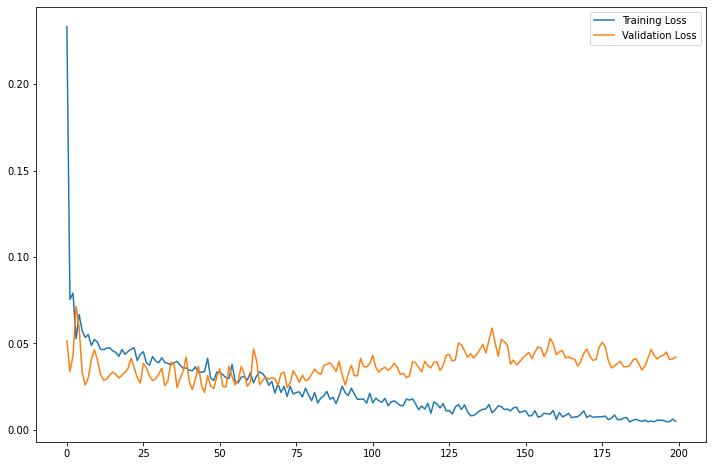

In [33]:
plt.figure(figsize = (12, 8))
plt.plot(best_history.history["loss"], label = "Training Loss")
plt.plot(best_history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

In [35]:
best_epoch = 50

final_lstm = LSTM_model(input_shape, 1, 75, 4, 256)
final_lstm.fit(X_train, y_train, epochs = best_epoch)

Epoch 1/50
2/2 [==============================] - 11s 88ms/step - loss: 0.2672 - MSE: 0.2672 - MAE: 0.4531
Epoch 2/50
2/2 [==============================] - 0s 72ms/step - loss: 0.0772 - MSE: 0.0772 - MAE: 0.2239
Epoch 3/50
2/2 [==============================] - 0s 71ms/step - loss: 0.0668 - MSE: 0.0668 - MAE: 0.2173
Epoch 4/50
2/2 [==============================] - 0s 70ms/step - loss: 0.0567 - MSE: 0.0567 - MAE: 0.1880
Epoch 5/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0655 - MSE: 0.0655 - MAE: 0.2072
Epoch 6/50
2/2 [==============================] - 0s 68ms/step - loss: 0.0520 - MSE: 0.0520 - MAE: 0.1840
Epoch 7/50
2/2 [==============================] - 0s 73ms/step - loss: 0.0544 - MSE: 0.0544 - MAE: 0.1882
Epoch 8/50
2/2 [==============================] - 0s 67ms/step - loss: 0.0567 - MSE: 0.0567 - MAE: 0.1959
Epoch 9/50
2/2 [==============================] - 0s 74ms/step - loss: 0.0517 - MSE: 0.0517 - MAE: 0.1847
Epoch 10/50
2/2 [============================

In [36]:
test_pred = final_lstm.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)

print(test_mse)

1/1 [==============================] - 2s 2s/step
0.05296672827633914


3/3 [==============================] - 0s 23ms/step


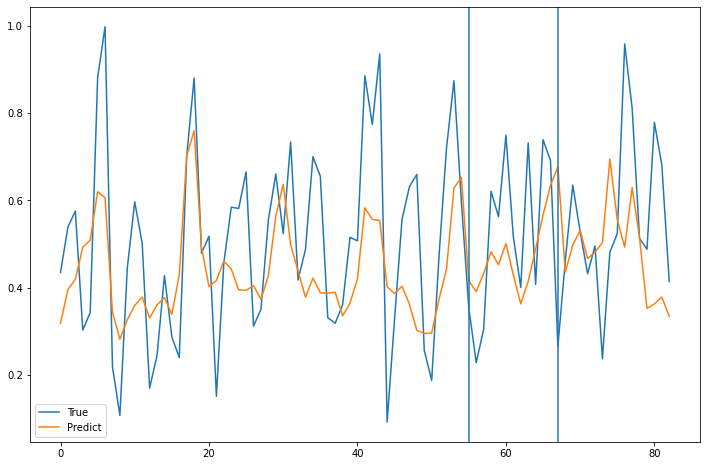

In [37]:
X = np.concatenate([X_train, X_val, X_test])
y = np.concatenate([y_train, y_val, y_test])

pred_y = final_lstm.predict(X)

plt.figure(figsize = (12, 8))
plt.plot(y, label = f"True")
plt.plot(pred_y, label = f"Predict")
plt.axvline(len(X_train))
plt.axvline(len(X_val) + len(X_train))
plt.legend()
plt.show()

Generally, we see that the model is able model the general patterns of weather quite well. However, extreme extreme peaks and valleys are harder for the model to predict.

# References

1)http://www.weather.gov.sg/climate-historical-daily/<br>
2)http://www.weather.gov.sg/wp-content/uploads/2022/06/Station_Records.pdf<br>
3)https://stackoverflow.com/questions/52570199/multivariate-lstm-with-missing-values<br>
4)https://towardsdatascience.com/choosing-the-right-hyperparameters-for-a-simple-lstm-using-keras-f8e9ed76f046#:~:text=Generally%2C%202%20layers%20have%20shown,to%20find%20reasonably<br>
5)https://www.manning.com/books/deep-learning-with-python![image.png](attachment:image.png)